In [4]:
import pandas as pd
import numpy as np
import datetime
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
plt.rcParams["figure.figsize"] = [10, 15]

In [6]:
pd.set_option('display.max_columns', None)

In [7]:
data = pd.read_csv('unit4.csv')

In [8]:
data_copy = data.copy()

In [9]:
# We will use data_copy to show the students some code that we have talked about earlier , just for recap

In [10]:
data.HOMEOWNR.value_counts()

H    49646
     21051
U    19872
Name: HOMEOWNR, dtype: int64

In [11]:
def clean_gender_col(x):
    if x in ['',' ' ,'U', 'C', 'J', 'A']:
        return 'other'
    else:
        return x

In [12]:
data['GENDER'].apply(lambda x: 'other' if x in ['',' ' ,'U', 'C', 'J', 'A'] else x)

0        F
1        M
2        M
3        F
4        F
        ..
90564    F
90565    M
90566    M
90567    M
90568    F
Name: GENDER, Length: 90569, dtype: object

In [13]:
data.drop(data[data.GENDER.isnull()].index)

,STATE,PVASTATE,DOB,MDMAUD,RECP3,GENDER,DOMAIN,INCOME,HOMEOWNR,HV1,HV2,HV3,HV4,IC1,IC2,IC3,IC4,IC5,VETERANS,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,MAXADATE,RFA_2,NGIFTALL,TIMELAG,AVGGIFT
0,IL,,3712,XXXX,,F,T2,NaN,,479,635,3,2,307,318,349,378,12883,,74,27,6,14,9702,L4E,31,4.0,7.741935
1,CA,,5202,XXXX,,M,S1,6.0,H,5468,5218,12,10,1088,1096,1026,1037,36175,,32,12,6,13,9702,L2G,3,18.0,15.666667
2,NC,,0,XXXX,,M,R2,3.0,U,497,546,2,1,251,292,292,340,11576,,63,26,6,14,9702,L4E,27,12.0,7.481481
3,CA,,2801,XXXX,,F,R2,1.0,U,1000,1263,2,1,386,388,396,423,15130,,66,27,6,14,9702,L4E,16,9.0,6.812500
4,FL,,2001,XXXX,X,F,S2,3.0,H,576,594,4,3,240,250,293,321,9836,,113,43,10,25,9702,L2F,37,14.0,6.864865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90564,FL,,4803,XXXX,,F,S2,6.0,H,733,875,4,3,285,288,333,334,11390,,59,23,5,12,9702,L4D,24,3.0,3.375000
90565,AK,,0,XXXX,,M,C2,NaN,,988,1025,6,6,433,481,499,535,18807,,14,6,5,12,9702,L1G,1,NaN,25.000000
90566,TX,,5001,XXXX,,M,C1,7.0,H,1679,1723,3,3,806,836,802,849,26538,,10,4,3,8,9702,L1F,1,NaN,20.000000
90567,MI,,3801,XXXX,X,M,C3,NaN,,376,377,4,3,263,264,319,345,12178,,33,14,7,17,9702,L3E,7,3.0,8.285714


In [14]:
data.head(20)

,STATE,PVASTATE,DOB,MDMAUD,RECP3,GENDER,DOMAIN,INCOME,HOMEOWNR,HV1,HV2,HV3,HV4,IC1,IC2,IC3,IC4,IC5,VETERANS,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,MAXADATE,RFA_2,NGIFTALL,TIMELAG,AVGGIFT
0,IL,,3712,XXXX,,F,T2,NaN,,479,635,3,2,307,318,349,378,12883,,74,27,6,14,9702,L4E,31,4.0,7.741935
1,CA,,5202,XXXX,,M,S1,6.0,H,5468,5218,12,10,1088,1096,1026,1037,36175,,32,12,6,13,9702,L2G,3,18.0,15.666667
2,NC,,0,XXXX,,M,R2,3.0,U,497,546,2,1,251,292,292,340,11576,,63,26,6,14,9702,L4E,27,12.0,7.481481
3,CA,,2801,XXXX,,F,R2,1.0,U,1000,1263,2,1,386,388,396,423,15130,,66,27,6,14,9702,L4E,16,9.0,6.812500
4,FL,,2001,XXXX,X,F,S2,3.0,H,576,594,4,3,240,250,293,321,9836,,113,43,10,25,9702,L2F,37,14.0,6.864865
5,AL,,0,XXXX,,,T2,NaN,,807,899,3,3,364,410,406,454,15619,,35,15,6,12,9702,L1F,4,6.0,12.750000
6,IN,,6001,XXXX,,F,T2,4.0,H,484,519,3,3,251,284,278,311,10717,,63,26,4,9,9702,L1E,14,4.0,7.642857
7,LA,,0,XXXX,,F,T2,2.0,U,702,787,3,3,367,457,431,466,14248,,35,14,6,12,9702,L3E,5,6.0,6.200000
8,IA,,0,XXXX,,M,R2,3.0,U,234,288,2,1,226,266,280,323,11127,,70,29,6,12,9702,L1F,11,8.0,18.090909
9,TN,,3211,XXXX,,M,T1,NaN,,565,581,3,3,291,329,311,332,10517,,28,11,4,9,9702,L1F,3,7.0,9.333333


In [15]:
lst = np.arange(10)

In [16]:
list(map(np.sqrt, filter(lambda x: x % 2 == 1, lst)))

[1.0, 1.7320508075688772, 2.23606797749979, 2.6457513110645907, 3.0]

In [17]:
from functools import reduce
lst = [0,1,2,3,4,5,6,7,8,9,10]
reduce(lambda a,b: a+b, map( np.sqrt, filter(lambda x: x % 2 == 1, lst)), 0)


10.613870096133258

In [18]:
from scipy.stats import chi2_contingency

data_crosstab = pd.crosstab(np.where(data['INCOME']>3,'HIGH_INCOME', 'LOW_INCOME'), data['GENDER'], margins = False)
chi2_contingency(data_crosstab, correction=False)

(2704.976526584617,
 0.0,
 6,
 array([[1.26907424e+03, 4.54051607e-01, 9.08103214e-01, 2.20977836e+04,
         1.52561340e+02, 1.68598443e+04, 7.42374378e+02],
        [1.52592576e+03, 5.45948393e-01, 1.09189679e+00, 2.65702164e+04,
         1.83438660e+02, 2.02721557e+04, 8.92625622e+02]]))

In [19]:
data.shape

(90569, 28)

In [20]:
# data.dtypes

In [21]:
nulls = pd.DataFrame(data.isna().sum()/len(data))
nulls= nulls.reset_index()
nulls.columns = ['column_name', 'Percentage Null Values']
nulls.sort_values(by='Percentage Null Values', ascending = False)

,column_name,Percentage Null Values
7,INCOME,0.222847
26,TIMELAG,0.106582
0,STATE,0.000000
15,IC3,0.000000
25,NGIFTALL,0.000000
24,RFA_2,0.000000
23,MAXADATE,0.000000
22,NUMPRM12,0.000000
21,CARDPM12,0.000000
20,CARDPROM,0.000000


INCOME might be an important factor in predicting the gift value, so even though it has a lot of null values , we will not drop the column
In this exercise we will try a more precise method to replace the null values, instead of simply replacing them by a constant value, mean or median

We will use the same method for the column TIMELAG

Null values can be represented as either NaN, None, or NaT (this is usually used for datetime columns)

Note: It is not the best idea to use df.dropna() as it deletes the complete row whereever there is a null value

<AxesSubplot:>

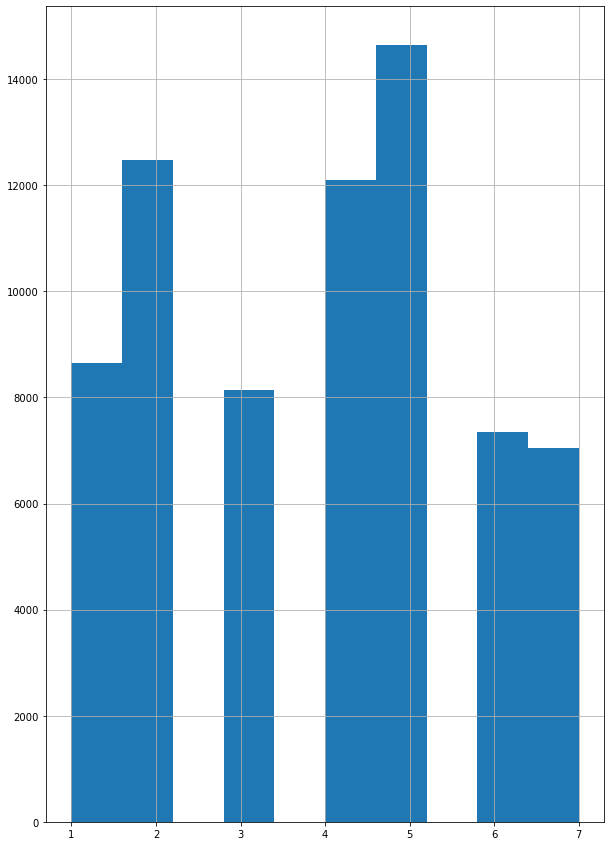

In [22]:
data['INCOME'].hist()

In [23]:
# Now lets choose a method to fill the null values 

<AxesSubplot:>

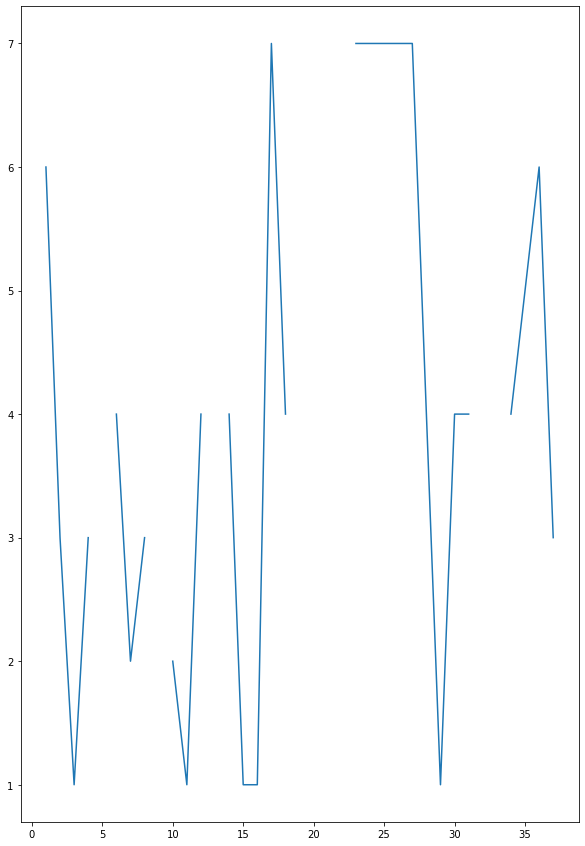

In [24]:
data['INCOME'][0:40].plot()

In [25]:
data['INCOME'].describe()

count    70386.000000
mean         3.878257
std          1.855265
min          1.000000
25%          2.000000
50%          4.000000
75%          5.000000
max          7.000000
Name: INCOME, dtype: float64

<AxesSubplot:>

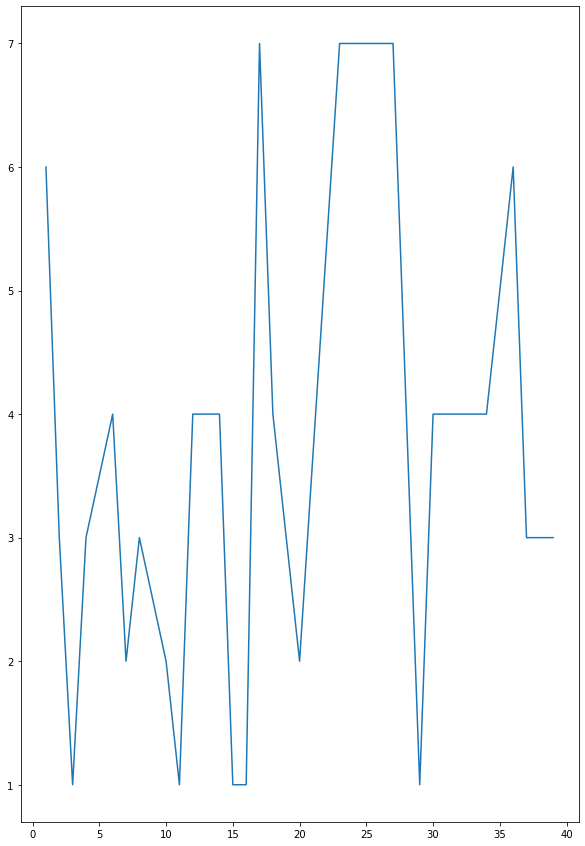

In [26]:
data['INCOME'][0:40].interpolate(method='linear').plot()

<AxesSubplot:>

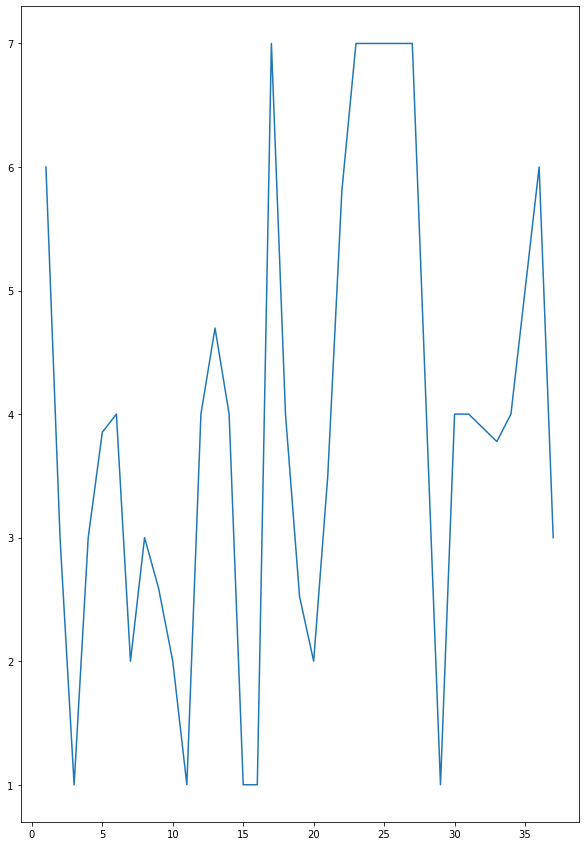

In [27]:
data['INCOME'][0:40].interpolate(method='akima').plot()

<AxesSubplot:>

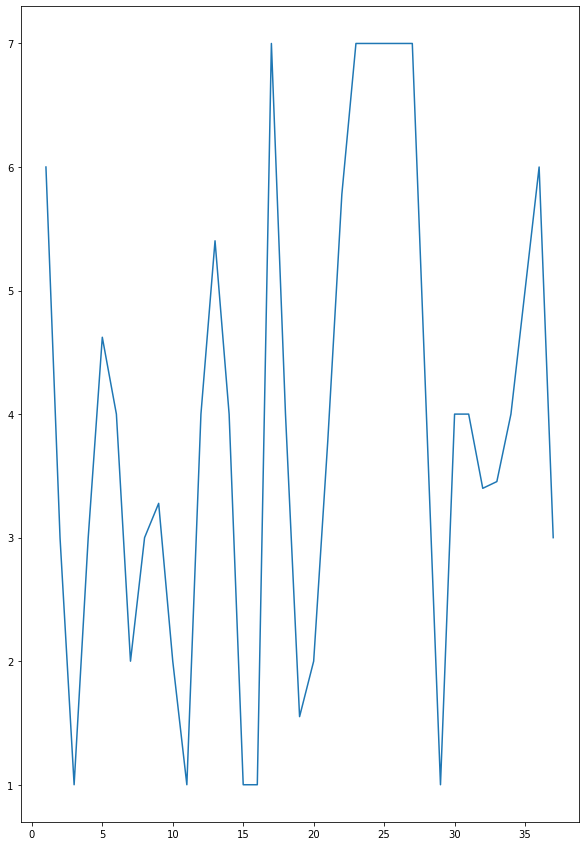

In [28]:
data['INCOME'][0:40].interpolate(method='polynomial', order=3).plot()

In [29]:
points = data['INCOME'].interpolate(method='akima')

In [30]:
points2 = data['INCOME'].fillna(np.mean(data['INCOME']))

In [31]:
np.median(data['INCOME'].fillna(0))

3.0

In [32]:
points3 = data['INCOME'].fillna(np.median(data['INCOME'].fillna(0)))

In [33]:
np.median(data['INCOME'])

nan

<AxesSubplot:xlabel='IC4', ylabel='INCOME'>

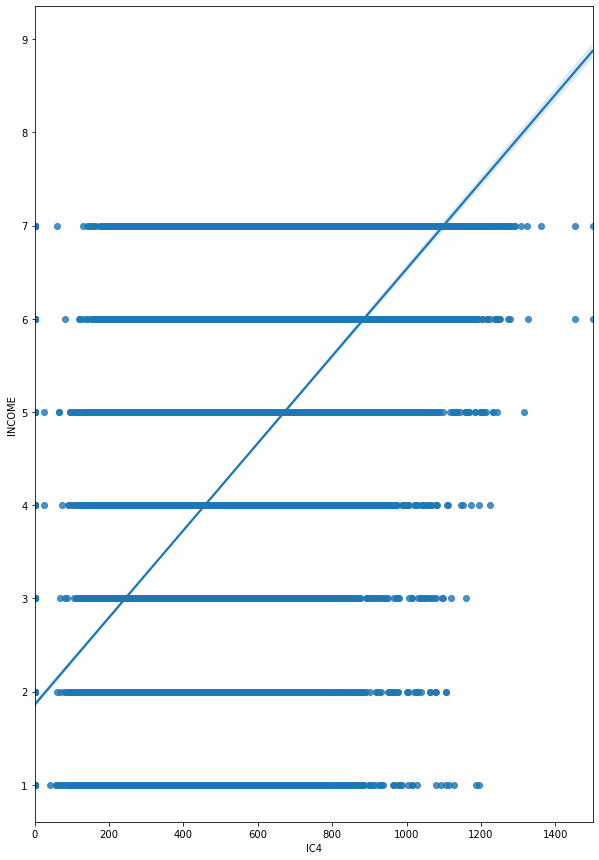

In [34]:
sns.regplot('IC4', 'INCOME', data=data)

<AxesSubplot:xlabel='INCOME', ylabel='Density'>

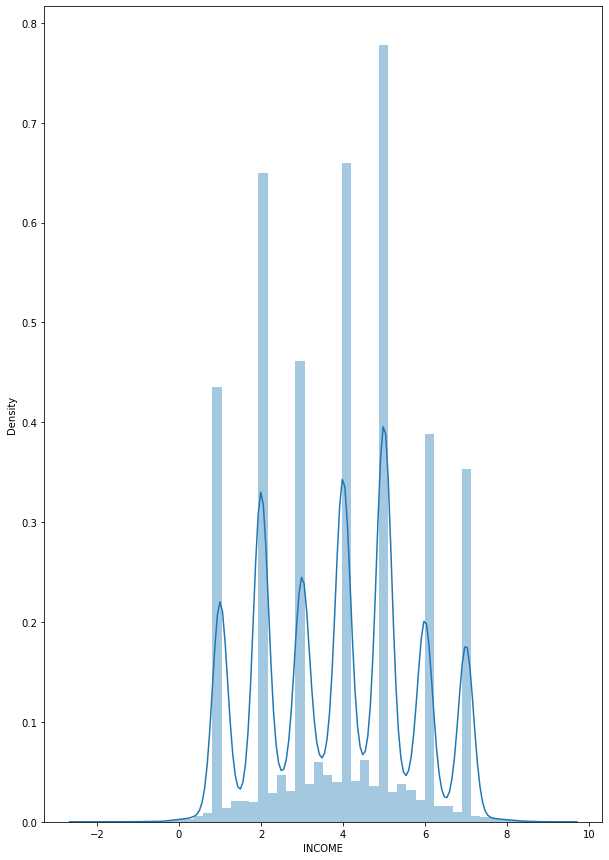

In [35]:
sns.distplot(points[1:])

<AxesSubplot:xlabel='INCOME', ylabel='Density'>

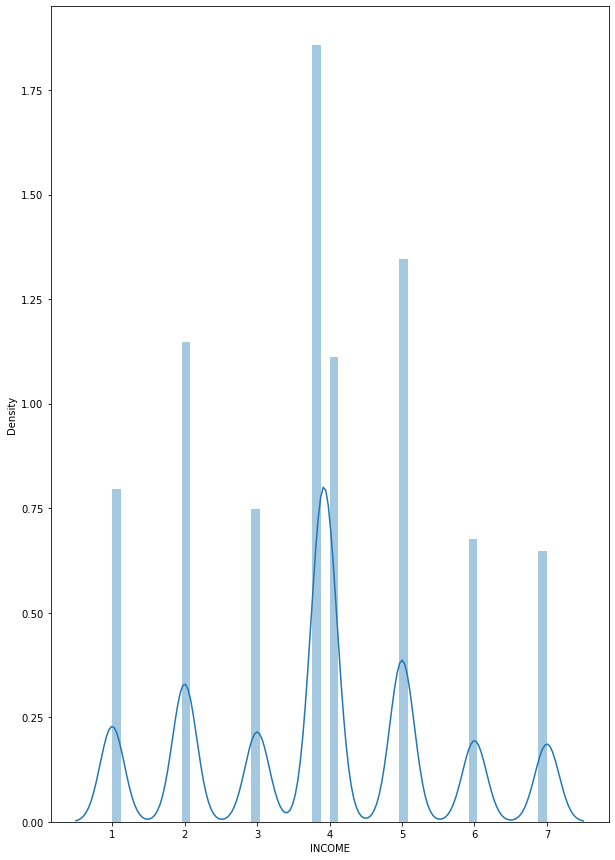

In [36]:
sns.distplot(points2)

<AxesSubplot:xlabel='INCOME', ylabel='Density'>

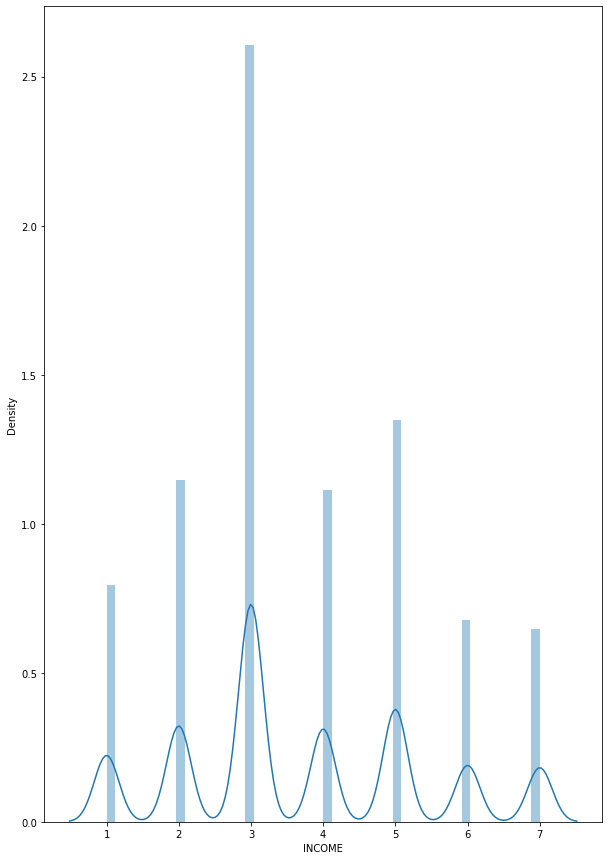

In [37]:
sns.distplot(points3)

In [38]:
data['INCOME'] = data['INCOME'].fillna(np.mean(data['INCOME']))

In [39]:
sum(data['TIMELAG'] ==0)

854

In [40]:
np.log(0)

-inf

<AxesSubplot:xlabel='IC1', ylabel='Density'>

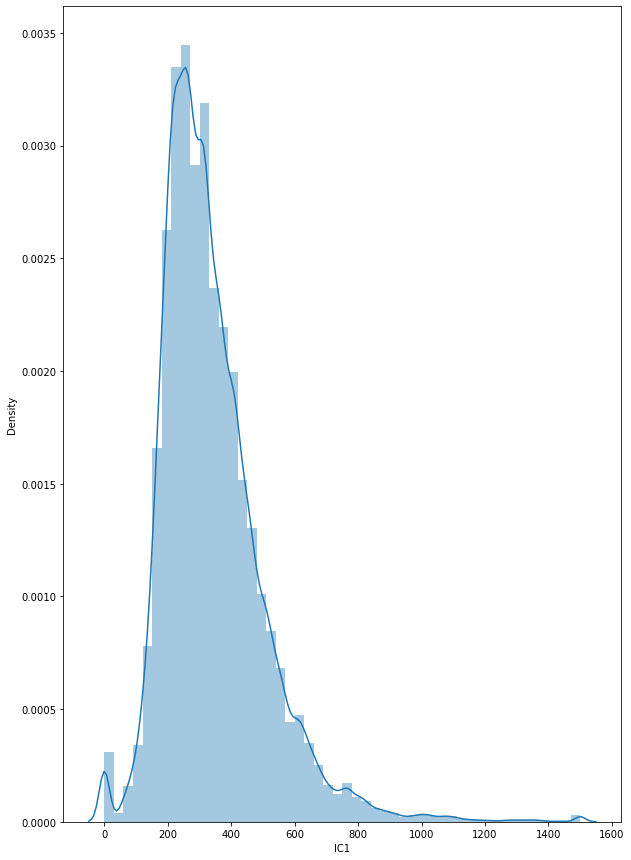

In [41]:
sns.distplot(data['IC1'])

In [42]:
iqr = np.percentile(data['TIMELAG'],75) - np.percentile(data['TIMELAG'],25)
upper_limit = np.percentile(data['TIMELAG'],75) + 1.5*iqr
print(upper_limit)


nan


In [43]:
points = list(filter(lambda x: x < 10000, data['TIMELAG']))
len(points)

80916

<AxesSubplot:>

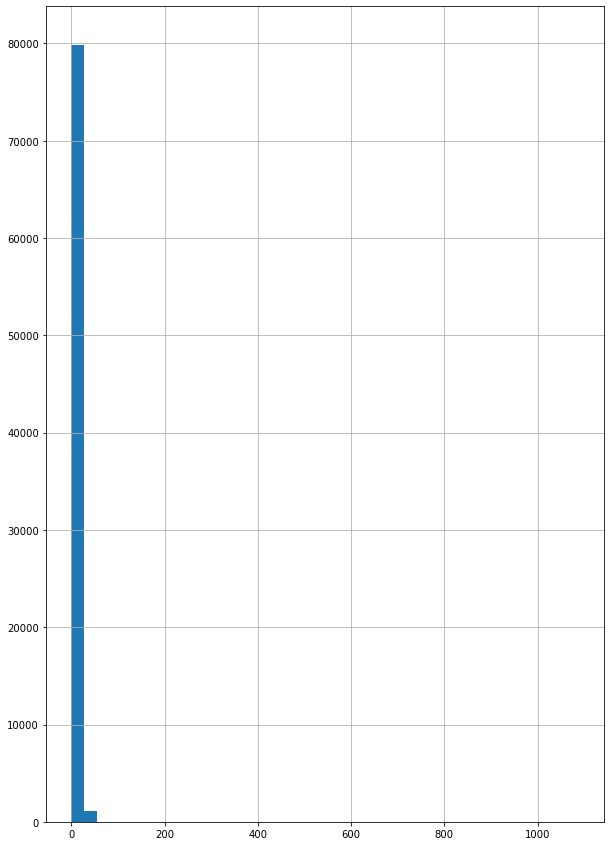

In [44]:
data['TIMELAG'].hist(bins=40)

<AxesSubplot:ylabel='TIMELAG'>

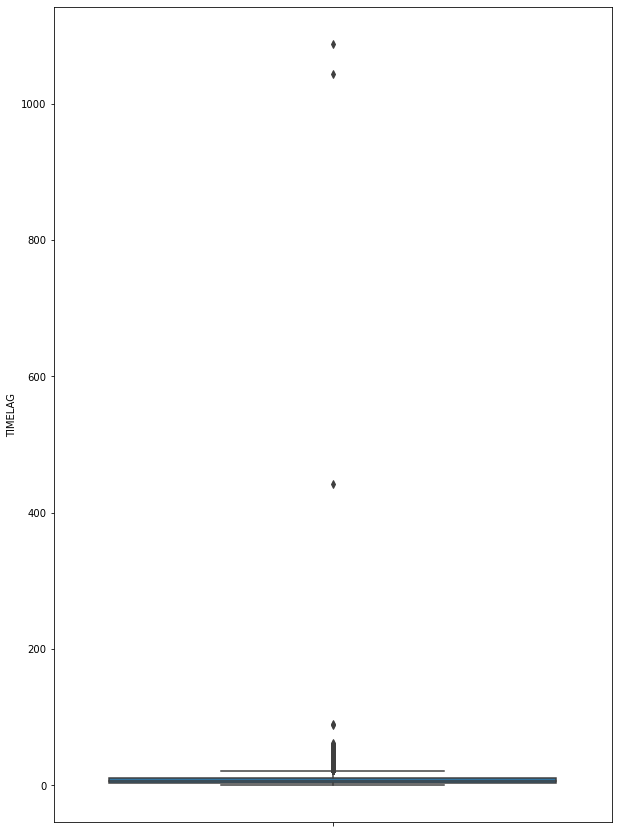

In [45]:
sns.boxplot(y=data['TIMELAG'])

In [46]:
# Data in Timelag column is highly skewed (positive skewness)
# Removing outliers straight away might not be the best idea as it would remove a lot of data points from the data
# We will try some transformations 

In [47]:
data['TIMELAG'].describe()

count    80916.000000
mean         8.114378
std          8.310877
min          0.000000
25%          4.000000
50%          6.000000
75%         11.000000
max       1088.000000
Name: TIMELAG, dtype: float64

In [48]:
def log_transfom_clean_(x):
    if np.isfinite(x) and x!=0:
        return np.log(x)
    else:
        return np.NAN # We are returning NaNs so that we can replace them later

<AxesSubplot:>

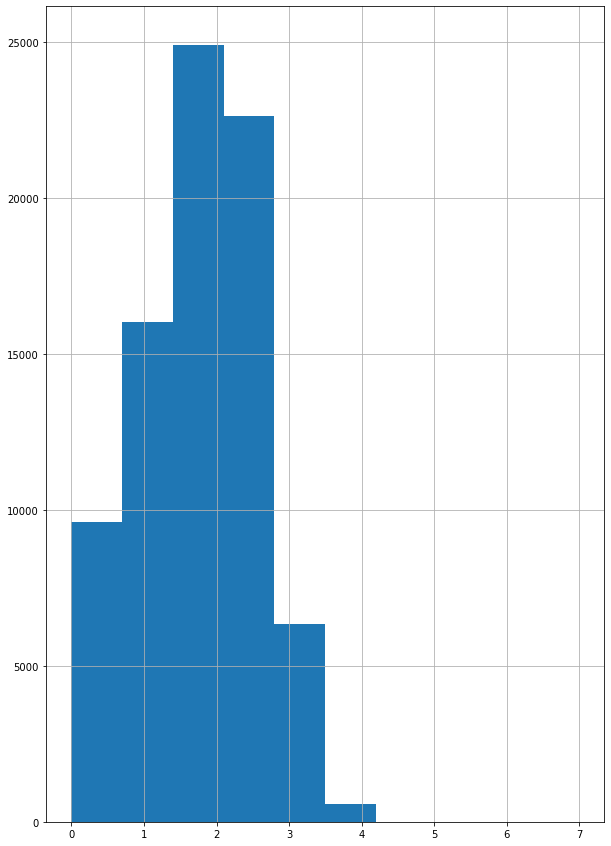

In [49]:
pd.Series(map(log_transfom_clean_, data['TIMELAG'])).hist()

In [50]:
pd.Series(map(log_transfom_clean_, data['TIMELAG'])).describe()

count    80062.000000
mean         1.826874
std          0.773448
min          0.000000
25%          1.386294
50%          1.945910
75%          2.397895
max          6.992096
dtype: float64

In [51]:
# data['TIMELAG'] = list(map(sqrt_transfom_clean_, data['TIMELAG']))

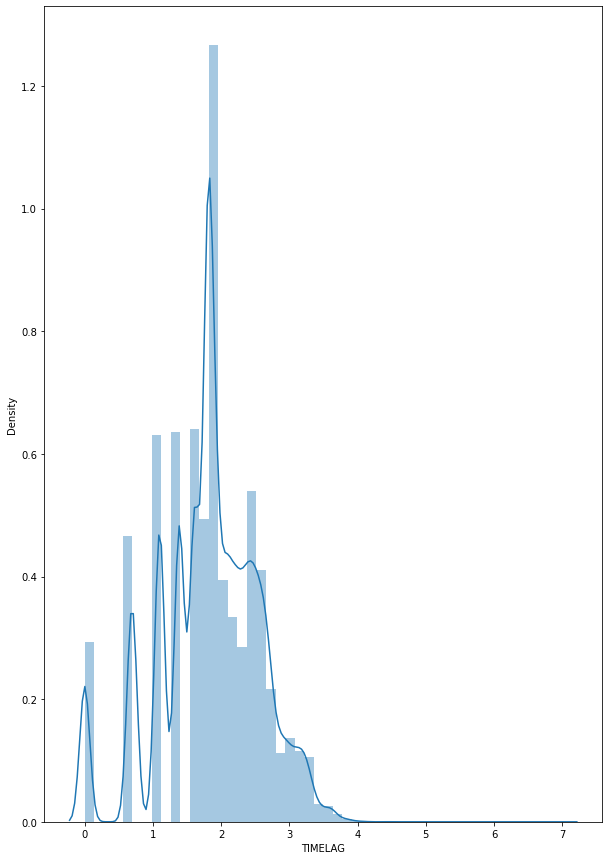

In [52]:
data['TIMELAG'] = list(map(log_transfom_clean_, data['TIMELAG']))
data['TIMELAG'] = data['TIMELAG'].fillna(np.mean(data['TIMELAG']))
sns.distplot(data['TIMELAG'])
plt.show()

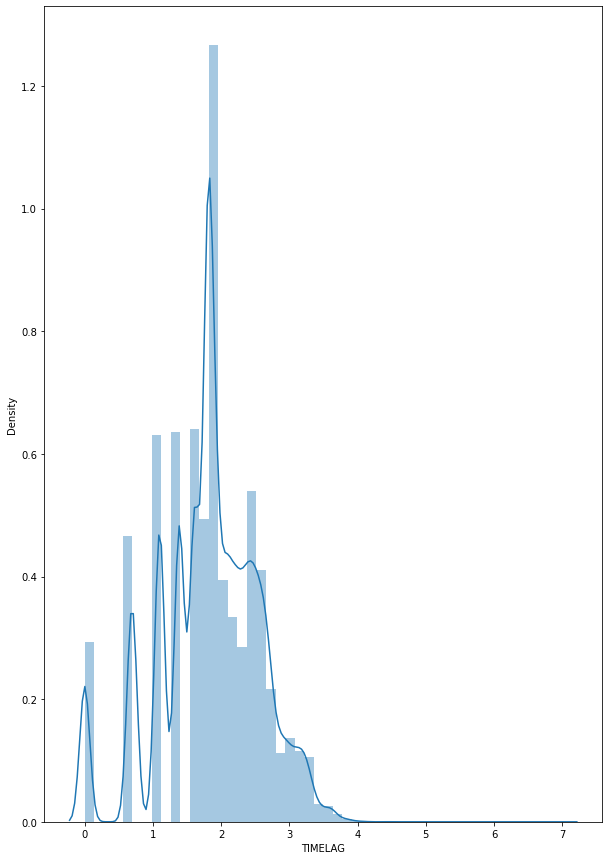

In [53]:
data['TIMELAG'] = data['TIMELAG'].fillna(np.mean(data['TIMELAG']))
sns.distplot(data['TIMELAG'])
plt.show()

In [54]:
def sqrt_transfom_clean_(x):
    if np.isfinite(x) and x>=0:
        return np.sqrt(x)
    else:
        return np.NAN # We are returning NaNs so that we can replace them later

<AxesSubplot:>

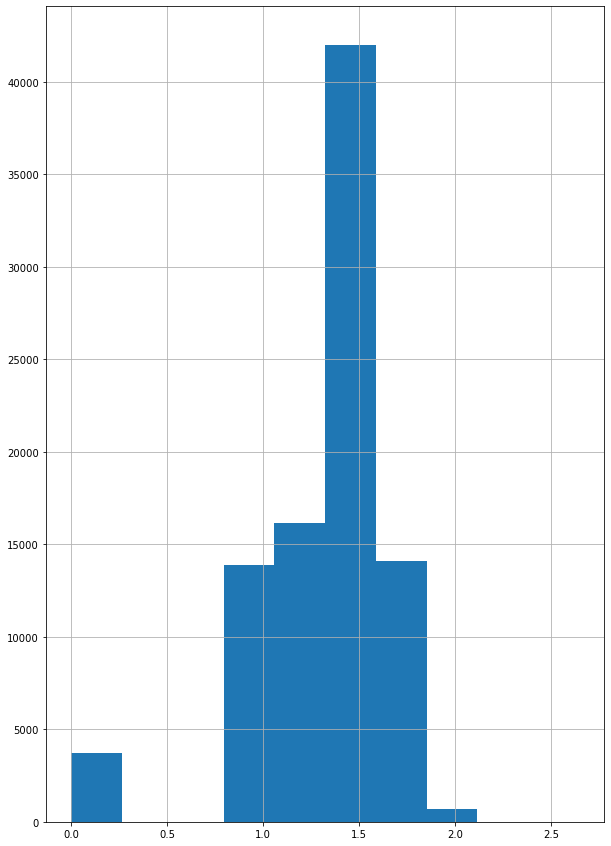

In [55]:
pd.Series(map(sqrt_transfom_clean_, data['TIMELAG'])).hist()

In [56]:
x = 2 
if x>0 and x<4:
    print(x)

2


In [57]:
numericals = data.select_dtypes(np.number)

In [58]:
numericals.head()

,DOB,INCOME,HV1,HV2,HV3,HV4,IC1,IC2,IC3,IC4,IC5,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,MAXADATE,NGIFTALL,TIMELAG,AVGGIFT
0,3712,3.878257,479,635,3,2,307,318,349,378,12883,74,27,6,14,9702,31,1.386294,7.741935
1,5202,6.000000,5468,5218,12,10,1088,1096,1026,1037,36175,32,12,6,13,9702,3,2.890372,15.666667
2,0,3.000000,497,546,2,1,251,292,292,340,11576,63,26,6,14,9702,27,2.484907,7.481481
3,2801,1.000000,1000,1263,2,1,386,388,396,423,15130,66,27,6,14,9702,16,2.197225,6.812500
4,2001,3.000000,576,594,4,3,240,250,293,321,9836,113,43,10,25,9702,37,2.639057,6.864865


As you can see after using the head function, there are some null values in the columns , PVSTATE, RECP3, HOMEWNR, VETERANS. But they are not showing up in dataframe above. So there might be empty spaces there that we
would need to check and clean later


## Lesson 4

In [59]:
data.head()

,STATE,PVASTATE,DOB,MDMAUD,RECP3,GENDER,DOMAIN,INCOME,HOMEOWNR,HV1,HV2,HV3,HV4,IC1,IC2,IC3,IC4,IC5,VETERANS,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,MAXADATE,RFA_2,NGIFTALL,TIMELAG,AVGGIFT
0,IL,,3712,XXXX,,F,T2,3.878257,,479,635,3,2,307,318,349,378,12883,,74,27,6,14,9702,L4E,31,1.386294,7.741935
1,CA,,5202,XXXX,,M,S1,6.000000,H,5468,5218,12,10,1088,1096,1026,1037,36175,,32,12,6,13,9702,L2G,3,2.890372,15.666667
2,NC,,0,XXXX,,M,R2,3.000000,U,497,546,2,1,251,292,292,340,11576,,63,26,6,14,9702,L4E,27,2.484907,7.481481
3,CA,,2801,XXXX,,F,R2,1.000000,U,1000,1263,2,1,386,388,396,423,15130,,66,27,6,14,9702,L4E,16,2.197225,6.812500
4,FL,,2001,XXXX,X,F,S2,3.000000,H,576,594,4,3,240,250,293,321,9836,,113,43,10,25,9702,L2F,37,2.639057,6.864865


In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90569 entries, 0 to 90568
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   STATE     90569 non-null  object 
 1   PVASTATE  90569 non-null  object 
 2   DOB       90569 non-null  int64  
 3   MDMAUD    90569 non-null  object 
 4   RECP3     90569 non-null  object 
 5   GENDER    90569 non-null  object 
 6   DOMAIN    90569 non-null  object 
 7   INCOME    90569 non-null  float64
 8   HOMEOWNR  90569 non-null  object 
 9   HV1       90569 non-null  int64  
 10  HV2       90569 non-null  int64  
 11  HV3       90569 non-null  int64  
 12  HV4       90569 non-null  int64  
 13  IC1       90569 non-null  int64  
 14  IC2       90569 non-null  int64  
 15  IC3       90569 non-null  int64  
 16  IC4       90569 non-null  int64  
 17  IC5       90569 non-null  int64  
 18  VETERANS  90569 non-null  object 
 19  NUMPROM   90569 non-null  int64  
 20  CARDPROM  90569 non-null  in

In [61]:
numericals = data.select_dtypes(np.number)

In [62]:
numericals.head()

,DOB,INCOME,HV1,HV2,HV3,HV4,IC1,IC2,IC3,IC4,IC5,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,MAXADATE,NGIFTALL,TIMELAG,AVGGIFT
0,3712,3.878257,479,635,3,2,307,318,349,378,12883,74,27,6,14,9702,31,1.386294,7.741935
1,5202,6.000000,5468,5218,12,10,1088,1096,1026,1037,36175,32,12,6,13,9702,3,2.890372,15.666667
2,0,3.000000,497,546,2,1,251,292,292,340,11576,63,26,6,14,9702,27,2.484907,7.481481
3,2801,1.000000,1000,1263,2,1,386,388,396,423,15130,66,27,6,14,9702,16,2.197225,6.812500
4,2001,3.000000,576,594,4,3,240,250,293,321,9836,113,43,10,25,9702,37,2.639057,6.864865


In [63]:
data['INCOME'] = data['INCOME'].fillna(3.0)

In [64]:
data['TIMELAG'] = data['TIMELAG'].fillna(0.0)

In [65]:
data = data[data['AVGGIFT']<200]

In [66]:
data.INCOME

0        3.878257
1        6.000000
2        3.000000
3        1.000000
4        3.000000
           ...   
90564    6.000000
90565    3.878257
90566    7.000000
90567    3.878257
90568    5.000000
Name: INCOME, Length: 90543, dtype: float64

In [67]:
X_nulls = data[data.INCOME.isnull() ][['HV1', 'IC1']]

In [68]:
y = data[~data.INCOME.isnull()]['INCOME']
X = data[~data.INCOME.isnull() ][['HV1', 'IC1']]

In [69]:
from sklearn.linear_model import LinearRegression

In [70]:
model = LinearRegression().fit(X,y)
income_pred = model.predict(X_nulls)

ValueError: Found array with 0 sample(s) (shape=(0, 2)) while a minimum of 1 is required.

In [ ]:
data[data.INCOME.isnull() ]['INCOME'] = np.round(income_pred)

In [ ]:
data_corr = data[['INCOME', 'HV1', 'HV2', 'IC1', 'IC2', 'IC3', 'IC4', 'NUMPROM', 'CARDPROM', 'NGIFTALL', 'TIMELAG', 'AVGGIFT']]
corr_matrix=data_corr.corr(method='pearson')
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [ ]:
sns.regplot('IC1','IC2', data=data_corr)

In [ ]:
model = LinearRegression().fit(data_corr[['HV1']], data_corr[['HV2']])
model.score(data_corr[['HV1']], data_corr[['HV2']])

In [ ]:
model = LinearRegression().fit(data_corr[['IC1']], data_corr[['IC2']])
model.score(data_corr[['IC1']], data_corr[['IC2']])

In [ ]:
sns.regplot('HV1','HV2', data=data_corr)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# This is the code to show how to use the __variance_inflation_factor__ function
vif = {}
for i in np.arange(data_corr.shape[1]):
    column_name = data_corr.columns[i]
    value = variance_inflation_factor(np.array(data_corr), i)
    vif[column_name] = value


In [ ]:
vif

In [ ]:
[variance_inflation_factor(np.array(data_corr), i) for i in np.arange(data_corr.shape[1])]

In [ ]:
flag = True
threshold = 50
while flag is True:
    #print(data_corr.head())
    flag = False
    values = [variance_inflation_factor(np.array(data_corr), i) for i in np.arange(data_corr.shape[1])]
    #print(values)
    if max(values)> threshold:
        col_index = values.index(max(values))
        column_name = data_corr.columns[col_index]
        data_corr = data_corr.drop([column_name], axis=1)
        flag = True

In [ ]:
[variance_inflation_factor(np.array(data_corr), i) for i in np.arange(data_corr.shape[1])]

In [ ]:
flag= True
while flag is True:
    flag = False
    for i in range(1, corr_matrix.shape[1]):
        if corr_matrix.iloc[i,range(i)].max() > 0.9:
            print(corr_matrix.columns[corr_matrix.iloc[i,range(i)].argmax()])
            col_name = corr_matrix.columns[corr_matrix.iloc[i,range(i)].argmax()]
            corr_matrix.drop([col_name], axis=1, inplace=True)
            corr_matrix.drop([col_name], inplace=True)
            display(corr_matrix)
            flag = True
            break

In [ ]:
corr_matrix

In [ ]:
for i in range(1, corr_matrix.shape[1]):
    corr_matrix[i,]

In [ ]:
flag = True
threshold = 50
while flag is True:
    #print(data_corr.head())
    flag = False
    values = [variance_inflation_factor(np.array(data_corr), i) for i in np.arange(data_corr.shape[1])]
    #print(values)
    if max(values)> threshold:
        col_index = values.index(max(values))
        column_name = data_corr.columns[col_index]
        data_corr = data_corr.drop([column_name], axis=1)
        flag = True

In [ ]:
data_corr.columns

In [ ]:
corr_matrix=data_corr.corr(method='pearson')
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

## Addressing categorical variables

In [71]:
categoricals = data.select_dtypes(np.object)

In [81]:
categoricals.head()

,STATE,PVASTATE,MDMAUD,RECP3,GENDER,DOMAIN,HOMEOWNR,VETERANS,RFA_2
0,IL,,XXXX,,F,T2,,,L4E
1,CA,,XXXX,,M,S1,H,,L2G
2,NC,,XXXX,,M,R2,U,,L4E
3,CA,,XXXX,,F,R2,U,,L4E
4,FL,,XXXX,X,F,S2,H,,L2F


### Finding correlations in categorical data (chi-square)

In [83]:
data_crosstab = pd.crosstab(data['DOMAIN'], data['RFA_2'], margins = False) 
data_crosstab

KeyError: 'RFA_2'

In [74]:
from scipy.stats import chi2_contingency
g, p, dof, expctd = chi2_contingency(data_crosstab, correction=False)
g, p, dof, expctd

(1393.9427974751684,
 1.6529980451212455e-162,
 238,
 array([[1.11621616e+02, 6.98699645e+02, 2.86780955e+02, 1.11980451e+02,
         2.48744442e+02, 1.05401809e+02, 5.42319340e+01, 1.73293397e+02,
         8.01876677e+01, 3.40414831e+01, 1.06430470e+02, 8.72447566e+01,
         4.66724761e+01, 2.06688977e+01, 2.16600000e+03],
        [2.98482180e+02, 1.86836027e+03, 7.66867632e+02, 2.99441724e+02,
         6.65155959e+02, 2.81850082e+02, 1.45019096e+02, 4.63395823e+02,
         2.14426118e+02, 9.10287488e+01, 2.84600775e+02, 2.33297152e+02,
         1.24804701e+02, 5.52697392e+01, 5.79200000e+03],
        [4.03610572e+02, 2.52641534e+03, 1.03696604e+03, 4.04908077e+02,
         8.99430503e+02, 3.81120484e+02, 1.96096264e+02, 6.26608440e+02,
         2.89949129e+02, 1.23089979e+02, 3.84839999e+02, 3.15466729e+02,
         1.68762157e+02, 7.47362910e+01, 7.83200000e+03],
        [2.60501971e+02, 1.63062175e+03, 6.69287963e+02, 2.61339419e+02,
         5.80518538e+02, 2.45986216e+02, 1.

In [75]:
data = data.drop(['RFA_2'], axis=1)

In [76]:
data_crosstab2 = pd.crosstab(data['STATE'], data['DOMAIN'], margins = False) 
g, p, dof, expctd = chi2_contingency(data_crosstab, correction=False)
g, p, dof, expctd

(1393.9427974751684,
 1.6529980451212455e-162,
 238,
 array([[1.11621616e+02, 6.98699645e+02, 2.86780955e+02, 1.11980451e+02,
         2.48744442e+02, 1.05401809e+02, 5.42319340e+01, 1.73293397e+02,
         8.01876677e+01, 3.40414831e+01, 1.06430470e+02, 8.72447566e+01,
         4.66724761e+01, 2.06688977e+01, 2.16600000e+03],
        [2.98482180e+02, 1.86836027e+03, 7.66867632e+02, 2.99441724e+02,
         6.65155959e+02, 2.81850082e+02, 1.45019096e+02, 4.63395823e+02,
         2.14426118e+02, 9.10287488e+01, 2.84600775e+02, 2.33297152e+02,
         1.24804701e+02, 5.52697392e+01, 5.79200000e+03],
        [4.03610572e+02, 2.52641534e+03, 1.03696604e+03, 4.04908077e+02,
         8.99430503e+02, 3.81120484e+02, 1.96096264e+02, 6.26608440e+02,
         2.89949129e+02, 1.23089979e+02, 3.84839999e+02, 3.15466729e+02,
         1.68762157e+02, 7.47362910e+01, 7.83200000e+03],
        [2.60501971e+02, 1.63062175e+03, 6.69287963e+02, 2.61339419e+02,
         5.80518538e+02, 2.45986216e+02, 1.

As you would see the **p-value** is 0 in this case also the p-value is smaller than 0.05 hence we reject the null hypothesis. Hence we can say that the variables are correlated to each other and drop one of the variables 


In [77]:
data = data.drop(['STATE'], axis=1)

## Transforming numerical data

In [78]:
data_corr.head()

NameError: name 'data_corr' is not defined

In [ ]:
data_corr.CARDPROM.hist()

### We drop the target variable

In [ ]:
numerical = data_corr.drop(['AVGGIFT'], axis=1)

In [ ]:
X_num = numerical

## Standardization

In [ ]:
X_num.describe()

In [ ]:
# Standardization/Standard Scaler

from sklearn.preprocessing import StandardScaler
transformer = StandardScaler().fit(X_num)
x_standardized = transformer.transform(X_num)
x_standardized

### Scaling

In [ ]:
# Min max scaler

from sklearn.preprocessing import MinMaxScaler
transformer = MinMaxScaler().fit(X_num)
x_min_max = transformer.transform(X_num)
x_min_max

### Normalization

In [ ]:
# Normalization

from sklearn.preprocessing import Normalizer
transformer = Normalizer().fit(X_num)
x_normalized = transformer.transform(X_num)
x_normalized

In [ ]:
# np.linalg.norm(x_normalized[4,])

In [ ]:
# Set up the matplotlib figure

f, axes = plt.subplots(1, 4, figsize=(15, 5), sharex=False)
sns.despine(left=True)

col = 1
sns.distplot(X_num.values[:,col], kde=True, color="b", ax=axes[0])
sns.distplot(x_standardized[:,col], kde=True, color="b", ax=axes[1])
sns.distplot(x_min_max[:,col], kde=True, color="b", ax=axes[2])
sns.distplot(x_normalized[:,col], kde=True, color="b", ax=axes[3])

axes[0].set_title(f'{X_num.columns[col]}')
axes[1].set_title(f'{X_num.columns[col]} (Standardized)')
axes[2].set_title(f'{X_num.columns[col]} (Min-Max)')
axes[3].set_title(f'{X_num.columns[col]} (Normalized)')

### Dealing with columns with too many values

In [ ]:
vals_domain = pd.DataFrame(data['DOMAIN'].value_counts())
vals_domain = vals_domain.reset_index()
vals_domain.columns = ['domain', 'counts']

In [ ]:
vals_domain

In [ ]:
group_vals_domain_df = vals_domain[vals_domain['counts']<5000]
group_vals_domain = list(group_vals_domain_df['domain'])
group_vals_domain

In [ ]:
def clean_vals_domain(x):
    if x in group_vals_domain:
        return 'other'
    else:
        return x

data['DOMAIN'] = list(map(clean_vals_domain, data['DOMAIN']))

In [ ]:
data['DOMAIN'].value_counts()

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(data[['DOMAIN']])
encoded = encoder.transform(data[['DOMAIN']]).toarray()
encoded

## Putting all together

In [ ]:
encoded_df = pd.DataFrame(encoded)
scaled_df = pd.DataFrame(x_standardized)
X = pd.concat([scaled_df, encoded_df], axis=1)
y = data_corr['AVGGIFT']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=100)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
model = LinearRegression()  
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
y_pred

In [ ]:
# plt.scatter(y_test, y_pred,  color='blue')

# plt.show()

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2:', metrics.r2_score(y_test, y_pred))

### KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=10)
model.fit(X_train, y_train)

predictions = model.predict(X_test)
score = model.score(X_test, y_test)

from sklearn import linear_model
from sklearn.metrics import r2_score
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
# predictions  = lm.predict(X_test)
r2_score(y_test, predictions)


## Bias over fitting

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
scores = []
for i in range(2,10):
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))


plt.figure(figsize=(10,6))
plt.plot(range(2,10),scores,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy scores vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
